In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COLORMAP = 'gist_rainbow'
DEFAULT_M = 2**32
DEFAULT_A = 1103515245
DEFAULT_C = 12345
LAMBDA = 1.5
SAMPLES_AMOUNT = 50000
QUARTER_OF_PI = np.pi / 4

In [3]:
def lcg(m=DEFAULT_M, a=DEFAULT_A, c=DEFAULT_C):
    lcg.current = (a * lcg.current + c) % m
    return lcg.current / m

def ravnomer(R, a = 0, b = 1):
    return a + R * (b - a)

def gauss(R):
    array = np.array(gauss.array)
    mean = array.mean()
    dispersion = array.var()
    sig = array.std()
    summary = sum(R)
    el = mean + sig * np.sqrt(12 / SAMPLES_AMOUNT) * (summary - SAMPLES_AMOUNT / 2)
    gauss.array.append(el)
    return el

def exponent(R, lamb=LAMBDA):
    return -1/lamb * np.log(R)

def gamma(R, lamb=LAMBDA):
    mult = 1
    for num in R:
        mult = mult * num
    return -1 / lamb * np.log(mult)

def treugol(a = 0, b = 1):
    rand1 = np.random.uniform(0, 1)
    rand2 = np.random.uniform(0, 1)
    while rand2 >= 1 - rand1:
        rand1 = np.random.uniform(0, 1)
        rand2 = np.random.uniform(0, 1)
    return a + (b - a) * rand1

def simpson(a = 0, b = 1):
    return sum(np.random.uniform(a / 2, b / 2, 2))
        
def apply_colormap(bins, patches):
    cm = plt.cm.get_cmap(COLORMAP)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

def plot_graph(sequence):
    plt.rcParams["figure.figsize"] = (20, 10)
    n, bins, patches = plt.hist(sequence, bins=20)
    plt.xticks(np.arange(0, 1.05, 0.05))
    #plt.axhline(y=2500, color='r', linestyle='-')
    apply_colormap(bins, patches)
    
    plt.show()
    
def get_math_values(sequence):
    array = np.array(sequence)
    
    mean = array.mean()
    dispersion = array.var()
    sig = array.std()
    
    print(f"Мат. ожидание: {mean}")
    print(f"Дисперсия: {dispersion}")
    print(f"Средняя квадратическая: {sig}")

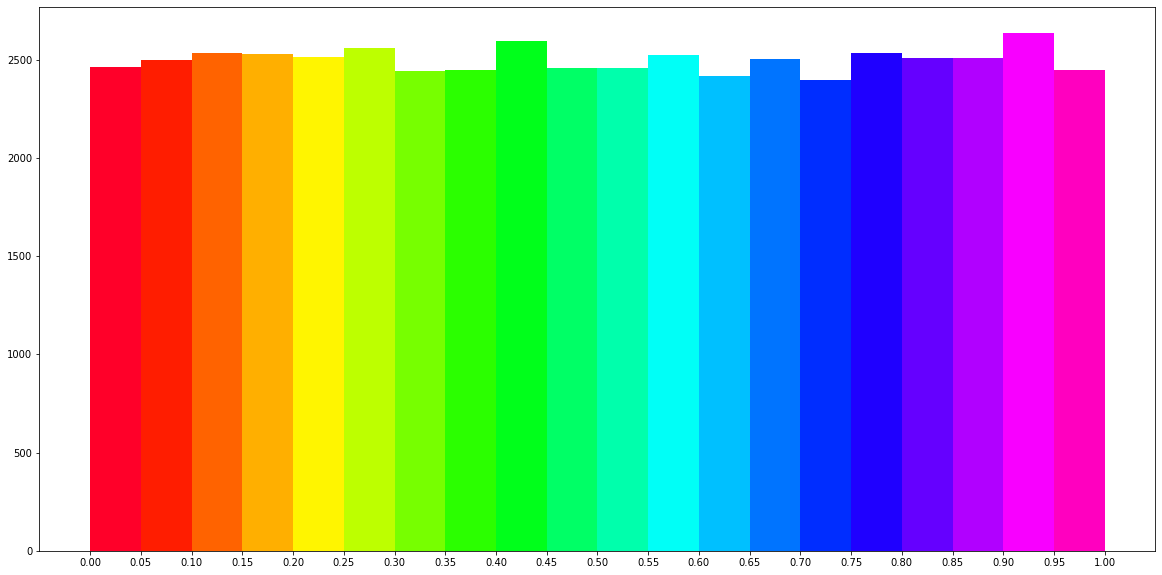

Мат. ожидание: 0.5000552520212158
Дисперсия: 0.08361601619461773
Средняя квадратическая: 0.2891643411532925


In [4]:
lcg.current = 1
sequence_rr = [lcg() for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence_rr)
get_math_values(sequence_rr)

In [ ]:
sequence = [ravnomer(np.random.choice(sequence_rr)) for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence)
get_math_values(sequence)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Degrees of freedom <= 0 for slice
  # This is added back by InteractiveShellApp.init_path()
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.

ValueError: autodetected range of [nan, nan] is not finite

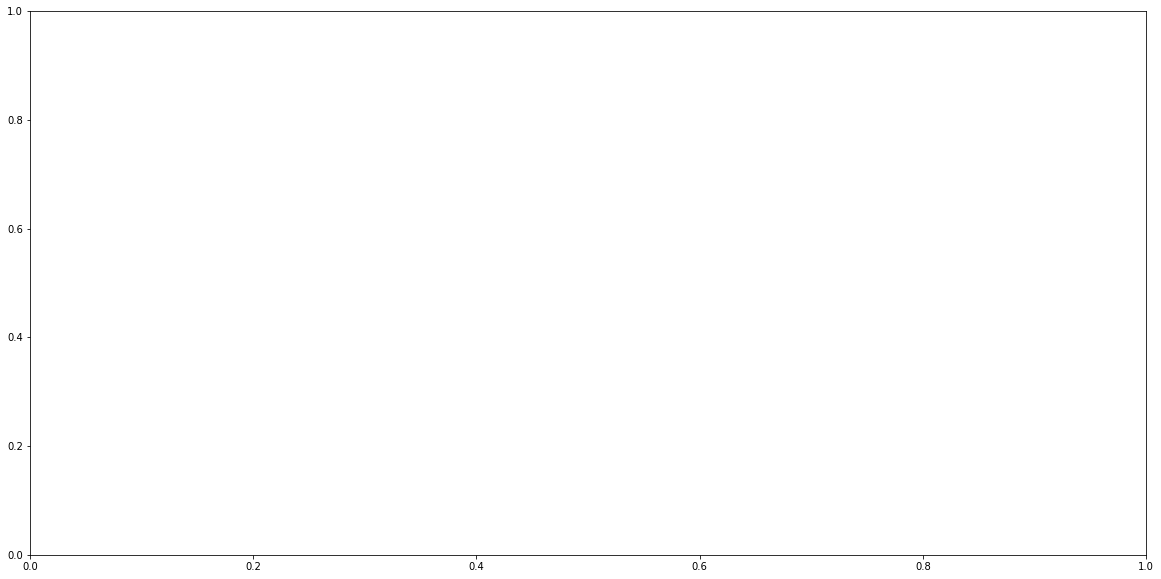

In [6]:
gauss.array = []
sequence_gauss = [gauss(sequence_rr) for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence_gauss)
get_math_values(sequence_gauss)

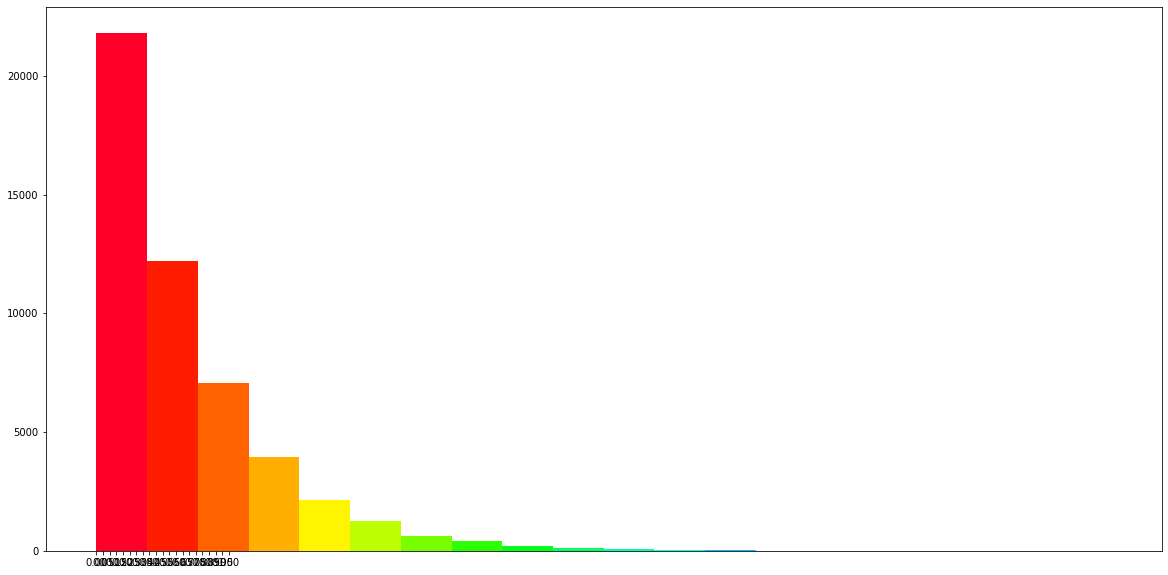

Мат. ожидание: 0.66681550023933
Дисперсия: 0.4442426183240846
Средняя квадратическая: 0.6665152798879292


In [7]:
sequence_exp = [exponent(np.random.choice(sequence_rr)) for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence_exp)
get_math_values(sequence_exp)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


ValueError: supplied range of [inf, inf] is not finite

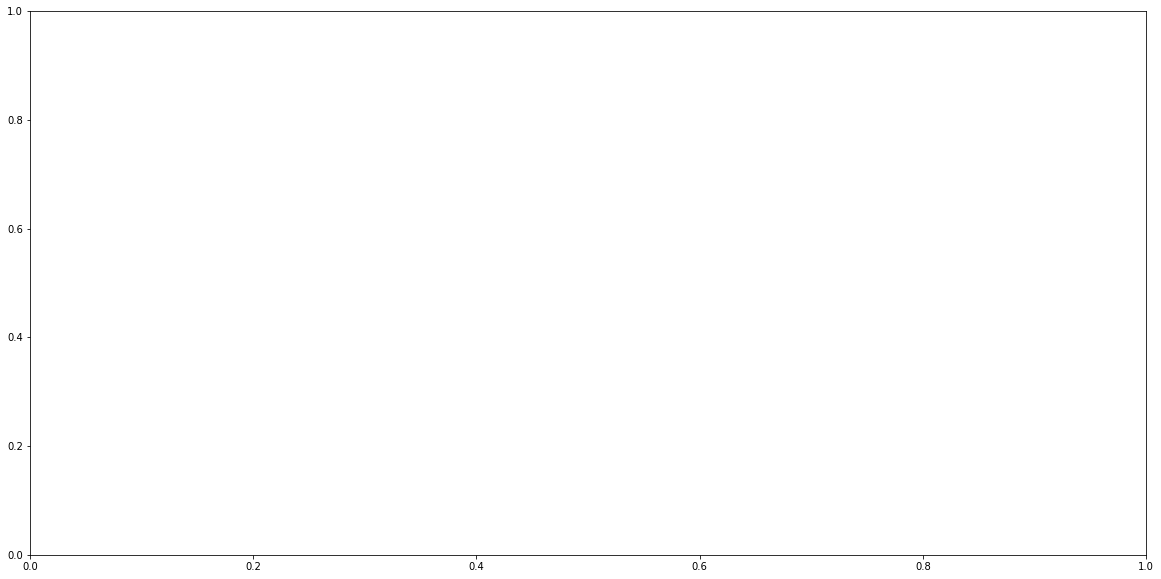

In [8]:
sequence_gamma = [gamma(sequence_rr) for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence_gamma)
get_math_values(sequence_gamma)

In [ ]:
sequence_treugol = [treugol() for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence_treugol)
get_math_values(sequence_treugol)

In [ ]:
sequence_simpson = [simpson() for i in range(SAMPLES_AMOUNT)]
plot_graph(sequence_simpson)
get_math_values(sequence_simpson)